#  **Exploring Activation Functions in Neural Networks**

**Scenario:**   
You are tasked with implementing and visualizing various activation functions to
observe how they transform inputs and affect the output. You will also train a simple neural network using these activation functions and evaluate their performance.   

**Lab Tasks:**   
**1. Implement and Visualize Activation Functions:**

Step 1: Import Necessary Libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


Step 2: Implement the Activation Functions


In [45]:
# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function (Binary)
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Function (Bipolar)
def bipolar_sigmoid_function(x):
    return 2 / (1 + np.exp(-x)) - 1

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)


Step 3: Visualize the Activation Functions


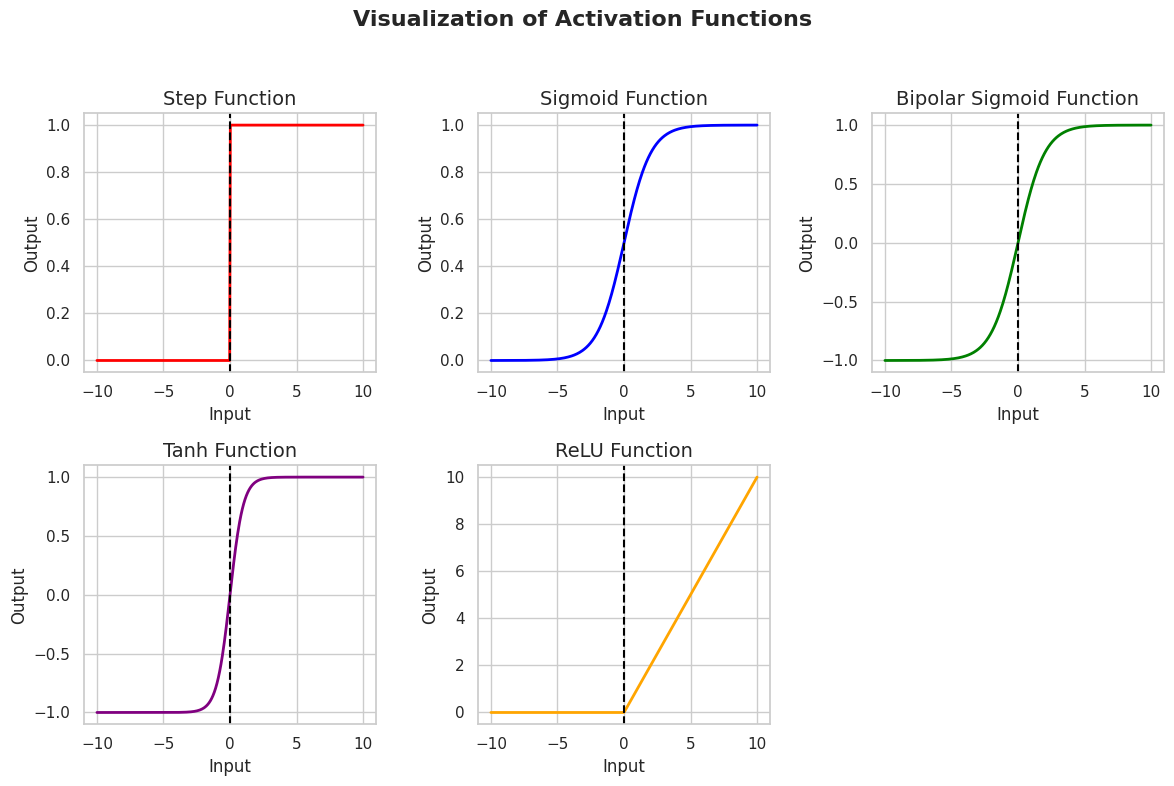

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input values
x = np.linspace(-10, 10, 400)

# Create the figure and subplots
plt.figure(figsize=(12, 8))

# Step Function
plt.subplot(2, 3, 1)
plt.plot(x, step_function(x), color='red', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='--')  # Highlight x=0
plt.title('Step Function', fontsize=14)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True)

# Sigmoid Function
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid_function(x), color='blue', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Sigmoid Function', fontsize=14)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True)

# Bipolar Sigmoid Function
plt.subplot(2, 3, 3)
plt.plot(x, bipolar_sigmoid_function(x), color='green', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Bipolar Sigmoid Function', fontsize=14)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True)

# Tanh Function
plt.subplot(2, 3, 4)
plt.plot(x, tanh_function(x), color='purple', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Tanh Function', fontsize=14)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True)

# ReLU Function
plt.subplot(2, 3, 5)
plt.plot(x, relu_function(x), color='orange', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('ReLU Function', fontsize=14)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True)

# Enhance layout and display
plt.suptitle('Visualization of Activation Functions', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the overall title
plt.show()


**Inferences:**  
Activation Functions (Lab Task 1):

1. The visualizations of the five activation functions highlight the distinct way
each function transforms input values. For example, the Step function outputs binary values (0 or 1) based on a threshold, while the Sigmoid and Bipolar Sigmoid functions map input values to a smooth, continuous curve between 0 and 1 or -1 and 1, respectively.  
2. Tanh centers output around zero, making it more suitable for balanced data. The ReLU function only outputs non-negative values, which helps in sparse activations but can suffer from the "dying ReLU" problem where inputs less than zero lead to zero outputs.

**Lab Task 2: Implement a Simple Neural Network**

Step 1: Create the XOR Dataset


In [47]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([[0], [1], [1], [0]])  # XOR output labels (binary classification)


Step 2: Build the Neural Network Model


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple neural network model
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer (for binary classification)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Step 3: Train and Evaluate the Model with Different Activation Functions*

In [49]:
# Train and evaluate models with different activation functions
activations = ['sigmoid', 'tanh', 'relu']
history_list = {}

for activation in activations:
    print(f"\nTraining with {activation} activation function:")
    model = create_model(activation)

    # Train the model
    history = model.fit(X, y, epochs=500, verbose=0)
    history_list[activation] = history

    # Evaluate the model and calculate accuracy
    loss, accuracy = model.evaluate(X, y, verbose=0)

    # Make predictions
    predictions = model.predict(X)

    # Convert predictions to binary output (rounding to 0 or 1)
    predictions_binary = np.round(predictions).astype(int)

    print(f"Accuracy with {activation}: {accuracy * 100:.2f}%")
    print(f"Predictions with {activation}:\n{predictions_binary.flatten()}")
    print(f"True Labels:\n{y.flatten()}")



Training with sigmoid activation function:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Accuracy with sigmoid: 50.00%
Predictions with sigmoid:
[1 0 1 0]
True Labels:
[0 1 1 0]

Training with tanh activation function:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Accuracy with tanh: 100.00%
Predictions with tanh:
[0 1 1 0]
True Labels:
[0 1 1 0]

Training with relu activation function:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Accuracy with relu: 75.00%
Predictions with relu:
[0 1 0 0]
True Labels:
[0 1 1 0]


Step 4: Plot Training Loss for Each Activation Function


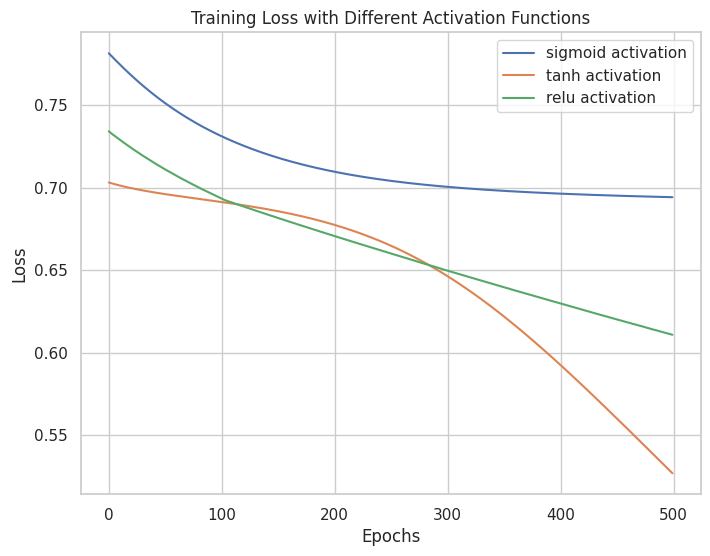

In [50]:
# Plot the loss curves for each activation function
plt.figure(figsize=(8, 6))

for activation in activations:
    plt.plot(history_list[activation].history['loss'], label=f'{activation} activation')

plt.title('Training Loss with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Inference**   
Neural Network (Lab Task 2):

1. The performance of the neural network on the XOR problem varies with different activation functions. Sigmoid and Tanh activation functions generally work well for this binary classification task, but ReLU often outperforms in terms of training efficiency, especially with deep networks.
2. The training loss curves reflect that the ReLU function typically converges faster, while Sigmoid and Tanh can experience slower convergence due to vanishing gradient issues. Despite this, all three activation functions can solve the XOR problem effectively with the appropriate number of training epochs.